# Auditoría 1: Estudio de las Lineas

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime as dt
import matplotlib.dates as mdates

from pyspark import SparkContext, SQLContext
from pyspark.sql import SQLContext
from pyspark.sql.types import *


sqlCtx = SQLContext(sc)

## 1. Estudio Laborables vs Festivos

### 1.1. Carga de Datos

In [3]:
df_linea1 = sqlContext.sql("select fecha,sum(n_viajeros) as nviajeros from emt_smartbus.viajeros_tramos_master where linea=1 group by fecha ORDER BY fecha")

df_linea1_laborables = sqlContext.sql("select fecha,sum(n_viajeros) as nviajeros from emt_smartbus.viajeros_tramos_master where linea=1 and festivo=0 and \
                                  (dia_semana='L' or dia_semana='M' or dia_semana='X' or dia_semana='J' or dia_semana='V') group by fecha ORDER BY fecha")

df_linea1_festivos = sqlContext.sql("select fecha,sum(n_viajeros) as nviajeros from emt_smartbus.viajeros_tramos_master where \
                                  linea=1 and (dia_semana='S' or dia_semana='D' or festivo=1) group by fecha ORDER BY fecha")


### 1.2. Plots Lineas

In [7]:
f1 = [int(i.fecha) for i in df_linea1.select('fecha').collect()]
f1_sort=sorted(f1)
m1= map(str,f1_sort)
sum_nviajeros1 = [float(i.nviajeros) for i in df_linea1.select('nviajeros').collect()]

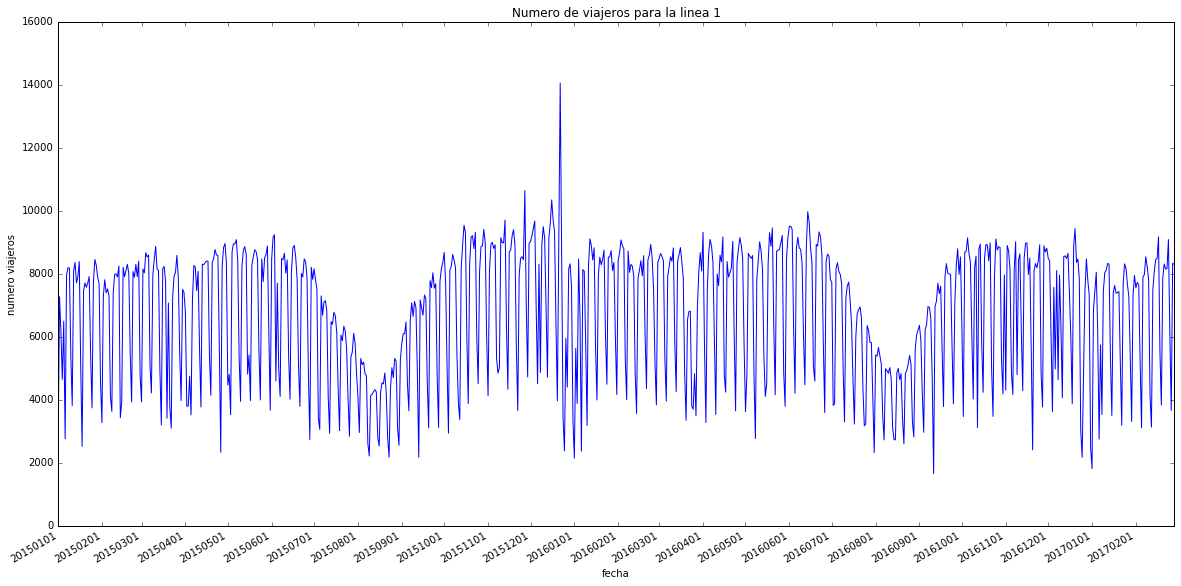

In [8]:
x = [dt.datetime.strptime(d,'%Y%m%d').date() for d in m1]
plt.figure(figsize=(20,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y%m%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.plot(x,sum_nviajeros1)
plt.gcf().autofmt_xdate()
plt.title('Numero de viajeros para la linea 1')

plt.xlabel('fecha')
plt.ylabel('numero viajeros')

In [9]:
f2 = [int(i.fecha) for i in df_linea1_laborables.select('fecha').collect()]
f2_sort=sorted(f2)
m2= map(str,f2_sort)
sum_nviajeros2 = [float(i.nviajeros) for i in df_linea1_laborables.select('nviajeros').collect()]

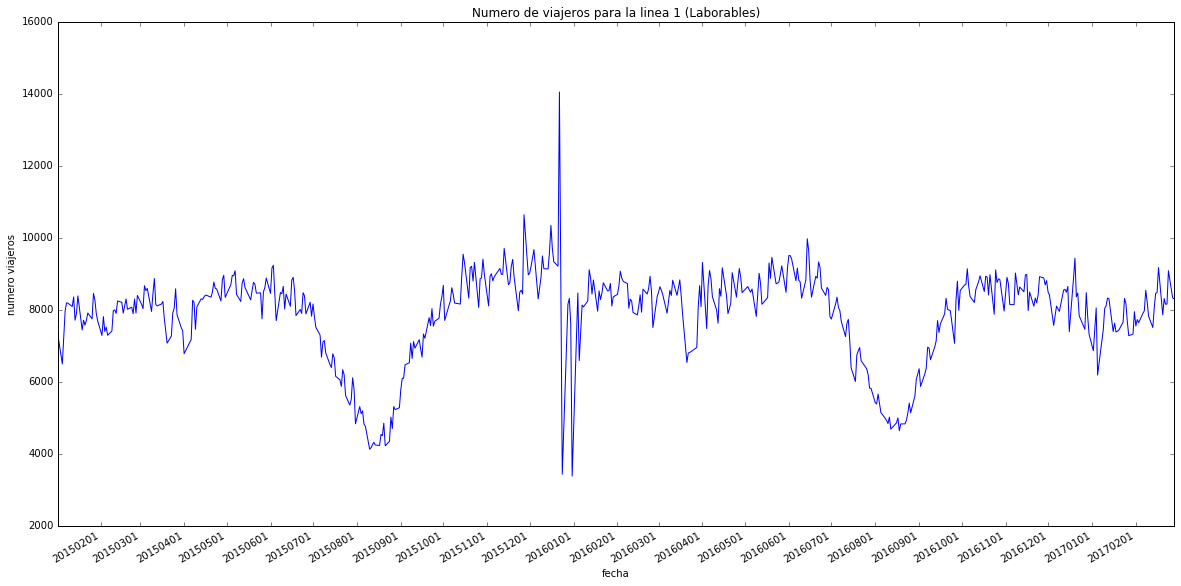

In [10]:
x = [dt.datetime.strptime(d,'%Y%m%d').date() for d in m2]
plt.figure(figsize=(20,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y%m%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.plot(x,sum_nviajeros2)
plt.gcf().autofmt_xdate()
plt.title('Numero de viajeros para la linea 1 (Laborables)')

plt.xlabel('fecha')
plt.ylabel('numero viajeros')

In [11]:
f3 = [int(i.fecha) for i in df_linea1_festivos.select('fecha').collect()]
f3_sort=sorted(f3)
m3= map(str,f3_sort)
sum_nviajeros3 = [float(i.nviajeros) for i in df_linea1_festivos.select('nviajeros').collect()]

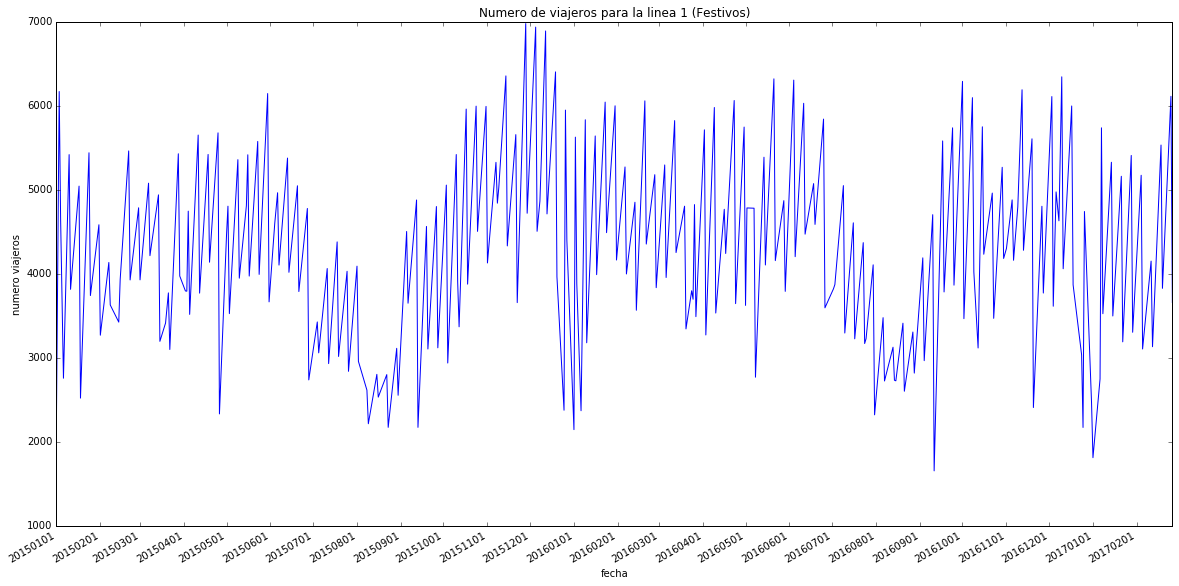

In [12]:
x = [dt.datetime.strptime(d,'%Y%m%d').date() for d in m3]
plt.figure(figsize=(20,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y%m%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.plot(x,sum_nviajeros3)
plt.gcf().autofmt_xdate()
plt.title('Numero de viajeros para la linea 1 (Festivos)')

plt.xlabel('fecha')
plt.ylabel('numero viajeros')

## 2. Plot Lineas por Tramos

### 2.1. Carga de datos

In [13]:
df_linea1_laborables_tramo612 = sqlContext.sql("select fecha,sum(n_viajeros) as nviajeros from emt_smartbus.viajeros_tramos_master where linea=1 and festivo=0 and \
                                  (dia_semana='L' or dia_semana='M' or dia_semana='X' or dia_semana='J' or dia_semana='V') and tramo>6 and tramo<=12 group by fecha ORDER BY fecha")

df_linea1_laborables_tramo1218 = sqlContext.sql("select fecha,sum(n_viajeros) as nviajeros from emt_smartbus.viajeros_tramos_master where linea=1 and festivo=0 and \
                                  (dia_semana='L' or dia_semana='M' or dia_semana='X' or dia_semana='J' or dia_semana='V') and tramo>12 and tramo<=18 group by fecha ORDER BY fecha")


### 2.2. Plot de Lineas por tramos

In [14]:
f1 = [int(i.fecha) for i in df_linea1_laborables_tramo612.select('fecha').collect()]
f1_sort=sorted(f1)
m1= map(str,f1_sort)
sum_nviajeros1 = [float(i.nviajeros) for i in df_linea1_laborables_tramo612.select('nviajeros').collect()]

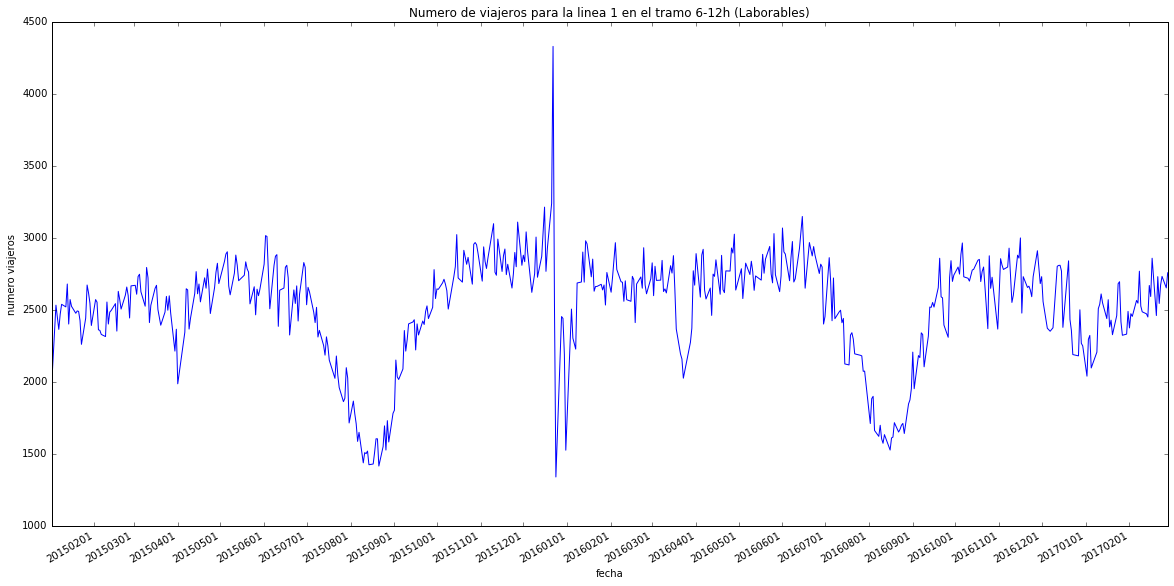

In [15]:
x = [dt.datetime.strptime(d,'%Y%m%d').date() for d in m1]
plt.figure(figsize=(20,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y%m%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.plot(x,sum_nviajeros1)
plt.gcf().autofmt_xdate()
plt.title('Numero de viajeros para la linea 1 en el tramo 6-12h (Laborables)')

plt.xlabel('fecha')
plt.ylabel('numero viajeros')

In [16]:
f2 = [int(i.fecha) for i in df_linea1_laborables_tramo1218.select('fecha').collect()]
f2_sort=sorted(f2)
m2= map(str,f2_sort)
sum_nviajeros2 = [float(i.nviajeros) for i in df_linea1_laborables_tramo1218.select('nviajeros').collect()]

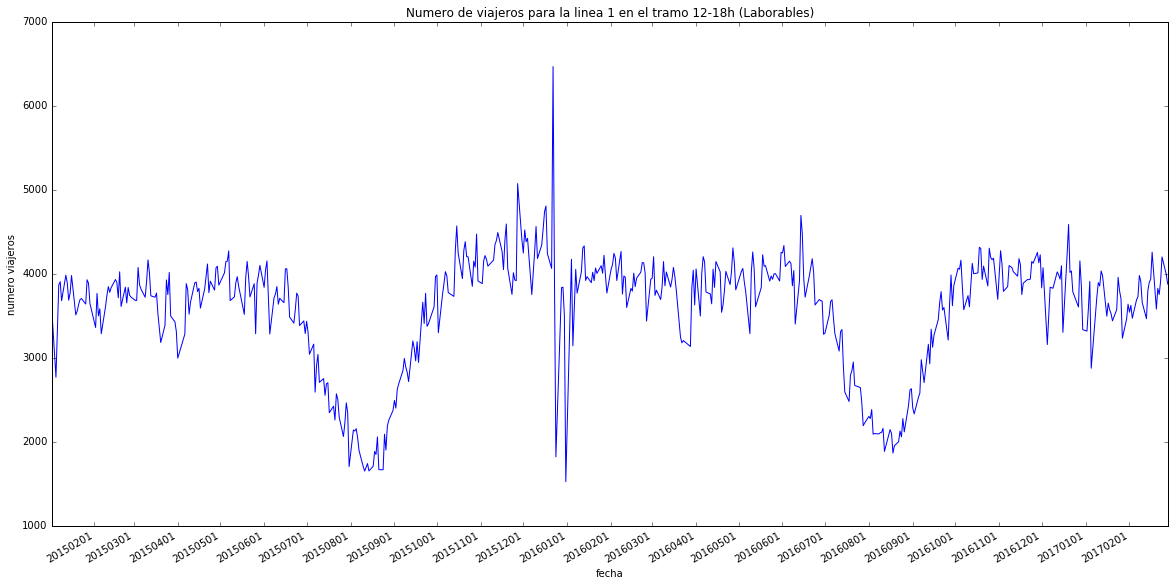

In [17]:
x = [dt.datetime.strptime(d,'%Y%m%d').date() for d in m2]
plt.figure(figsize=(20,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y%m%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.plot(x,sum_nviajeros2)
plt.gcf().autofmt_xdate()
plt.title('Numero de viajeros para la linea 1 en el tramo 12-18h (Laborables)')

plt.xlabel('fecha')
plt.ylabel('numero viajeros')

## 3. Detección de Outliers

### 3.1. Carga de Datos

In [28]:
df_linea1_laborables_tramo06 = sqlContext.sql("select fecha,sum(n_viajeros) as nviajeros from emt_smartbus.viajeros_tramos_master where linea=1 and festivo=0 and \
                                  (dia_semana='L' or dia_semana='M' or dia_semana='X' or dia_semana='J' or dia_semana='V') and tramo>0 and tramo<=6 group by fecha ORDER BY fecha")

df_linea501_laborables_tramo1114 = sqlContext.sql("select fecha,sum(n_viajeros) as nviajeros from emt_smartbus.viajeros_tramos_master where linea=501 and festivo=0 and \
                                  (dia_semana='L' or dia_semana='M' or dia_semana='X' or dia_semana='J' or dia_semana='V') and tramo>11 and tramo<=14 group by fecha ORDER BY fecha")


### 3.2. Plot de las Lineas

In [29]:
f1 = [int(i.fecha) for i in df_linea1_laborables_tramo06.select('fecha').collect()]
f1_sort=sorted(f1)
m1= map(str,f1_sort)
sum_nviajeros1 = [float(i.nviajeros) for i in df_linea1_laborables_tramo06.select('nviajeros').collect()]

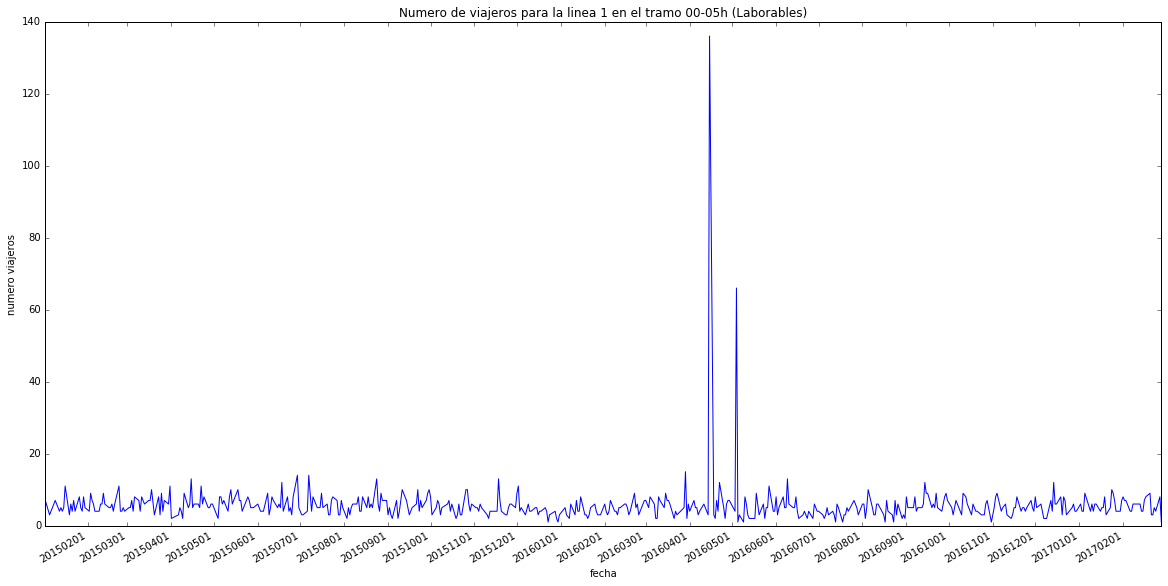

In [30]:
x = [dt.datetime.strptime(d,'%Y%m%d').date() for d in m1]
plt.figure(figsize=(20,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y%m%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.plot(x,sum_nviajeros1)
plt.gcf().autofmt_xdate()
plt.title('Numero de viajeros para la linea 1 en el tramo 00-06h (Laborables)')

plt.xlabel('fecha')
plt.ylabel('numero viajeros')

In [31]:
f2 = [int(i.fecha) for i in df_linea501_laborables_tramo1114.select('fecha').collect()]
f2_sort=sorted(f2)
m2= map(str,f2_sort)
sum_nviajeros2 = [float(i.nviajeros) for i in df_linea501_laborables_tramo1114.select('nviajeros').collect()]

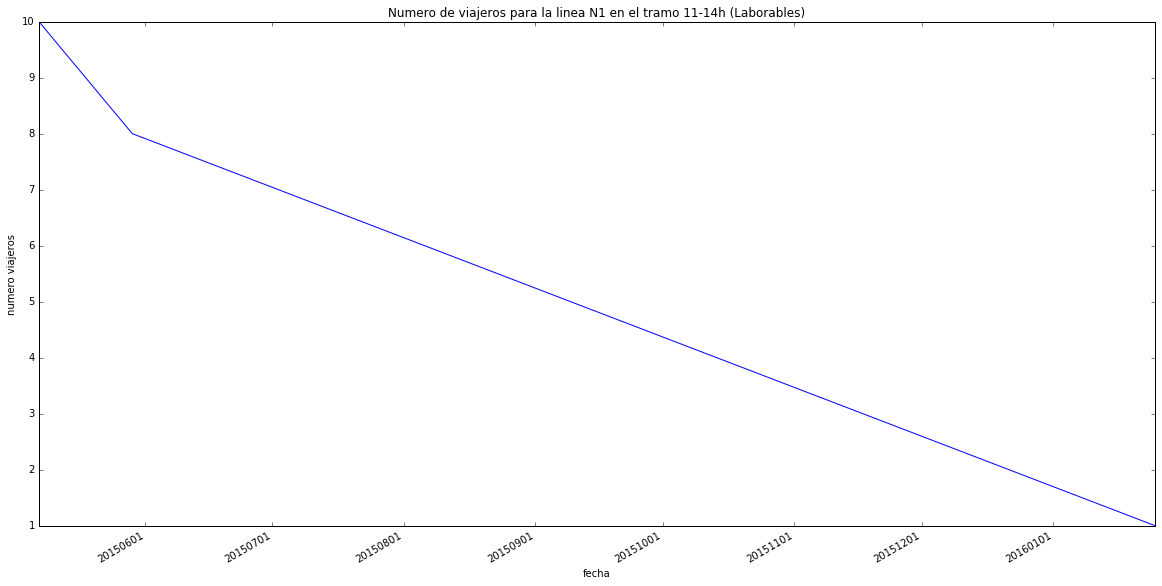

In [32]:
x = [dt.datetime.strptime(d,'%Y%m%d').date() for d in m2]
plt.figure(figsize=(20,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y%m%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.plot(x,sum_nviajeros2)
plt.gcf().autofmt_xdate()
plt.title('Numero de viajeros para la linea N1 en el tramo 11-14h (Laborables)')

plt.xlabel('fecha')
plt.ylabel('numero viajeros')